In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [2]:
diabets = datasets.load_diabetes()

In [3]:
x_train,x_test,y_train,y_test=train_test_split(diabets.data,diabets.target,test_size=0.25,random_state=42)

In [4]:
model=KNeighborsRegressor(n_neighbors=10)

In [5]:
from sklearn.model_selection import cross_val_score # Kfold cross validation

In [6]:
X=diabets.data
Y=diabets.target

In [7]:
cross_val_score(model,X,Y,cv=5,scoring="neg_mean_squared_error") # 에러를 정수로 만들어서 사용할 수 있게끔 neg를 사용 |스코어는 높은 값일수록 좋고 에러는 작은 값일수록 좋기에 -를 붙여서 가장 작은 값을 갸쟝 크게 만들어서 스코어에 입력 

array([-3206.7541573 , -3426.43134831, -3587.94215909, -3039.49443182,
       -3282.60159091])

--------

# Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
iris= datasets.load_iris()

In [10]:
model1=KNeighborsClassifier()

In [11]:
cross_val_score(model1,iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [12]:
cross_val_score(model1,iris.data,iris.target,cv=5,scoring='f1_macro') #f1은 바이너리라 안 됨!!!!!!

array([0.96658312, 1.        , 0.93265993, 0.96658312, 1.        ])

---

In [13]:
from sklearn.model_selection import KFold
import numpy as np

In [14]:
X=np.array([['N','Y'],['Y','Y'],['N','Y'],['Y','Y'],['Y','Y'],['Y','Y']])

In [15]:
Y=np.array(['cat','dog','cat','dog','dog','dog'])

In [16]:
X

array([['N', 'Y'],
       ['Y', 'Y'],
       ['N', 'Y'],
       ['Y', 'Y'],
       ['Y', 'Y'],
       ['Y', 'Y']], dtype='<U1')

In [17]:
Y

array(['cat', 'dog', 'cat', 'dog', 'dog', 'dog'], dtype='<U3')

In [18]:
kf=KFold(2)

In [19]:
list(kf.split(X))

[(array([3, 4, 5]), array([0, 1, 2])), (array([0, 1, 2]), array([3, 4, 5]))]

In [20]:
for train_index, test_index in kf.split(X): ## ['dog' 'dog' 'dog']학습시켜서 ['cat' 'dog' 'cat']을 분류 할 수 없다. cat은 학습시키지 못했기 때문에
    x_train,x_test= X[train_index],X[test_index]
    y_train,y_test= Y[train_index],Y[test_index]
    print('Train',train_index)
    print(x_train, '/', y_train)
    print('Test',test_index)
    print(x_test,'/',y_test)
    print('-'*30)

Train [3 4 5]
[['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']] / ['dog' 'dog' 'dog']
Test [0 1 2]
[['N' 'Y']
 ['Y' 'Y']
 ['N' 'Y']] / ['cat' 'dog' 'cat']
------------------------------
Train [0 1 2]
[['N' 'Y']
 ['Y' 'Y']
 ['N' 'Y']] / ['cat' 'dog' 'cat']
Test [3 4 5]
[['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']] / ['dog' 'dog' 'dog']
------------------------------


In [21]:
#Stratified=층화추출
from sklearn.model_selection import StratifiedKFold # 셀 20번에서 했던 실수를 방지하기 위해  stratify=y를 했던 것 처럼 비율을 정해서 데이터를 학습시킬 수 있다.

In [22]:
skf=StratifiedKFold(2)

In [23]:
for train_index, test_index in skf.split(X,Y):
    x_train,x_test= X[train_index],X[test_index]
    y_train,y_test= Y[train_index],Y[test_index]
    print('Train',train_index)
    print(x_train, '/', y_train)
    print('Test',test_index)
    print(x_test,'/',y_test)
    print('-'*30)

Train [2 4 5]
[['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']] / ['cat' 'dog' 'dog']
Test [0 1 3]
[['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']] / ['cat' 'dog' 'dog']
------------------------------
Train [0 1 3]
[['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']] / ['cat' 'dog' 'dog']
Test [2 4 5]
[['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']] / ['cat' 'dog' 'dog']
------------------------------


---

### LinearRegression(mean_squared_error)

In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #에러의 값을 제곱하여 작은 에러의 값을 크게 본다.

In [25]:
lr= LinearRegression()

In [26]:
diabets=datasets.load_diabetes()

In [27]:
diabets

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [28]:
scores=[]
for _ in range(10):# _변수 지정을 안 하고 for문 돌리기 
    x_train,x_test,y_train,y_test=train_test_split(diabets.data,diabets.target,test_size=0.25)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    score=mean_squared_error(y_test,pred)
    scores.append(score)

In [29]:
scores

[3322.238219713057,
 2697.1276487876107,
 3329.475618139716,
 3308.257591137799,
 2706.9720421196157,
 3002.0531849303234,
 3250.4836827134727,
 3100.6004144812805,
 3067.140445762527,
 3029.7607983385374]

In [79]:
df=pd.DataFrame({'RMSE' : np.sqrt(scores)}) # RMSE는 mse의 루트를 씌운 값(sqrt는 루트)

C:\Users\user\AppData\Local\Temp\ipykernel_8936\3214759307.py:1: RuntimeWarning: invalid value encountered in sqrt
  df=pd.DataFrame({'RMSE' : np.sqrt(scores)}) # RMSE는 mse의 루트를 씌운 값


In [31]:
df.T

,0,1,2,3,4,5,6,7,8,9
RMSE,57.63886,51.933878,57.701608,57.517455,52.028569,54.790995,57.013013,55.683035,55.38177,55.043263


In [32]:
import seaborn as sns

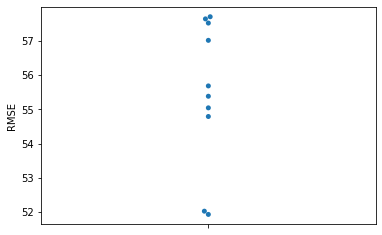

In [33]:
swarm=sns.swarmplot(y='RMSE',data=df)# 데이터가 분산되어 있어서 모아줘야 한다.

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler=MinMaxScaler()

In [36]:
X=scaler.fit_transform(diabets.data)

In [37]:
scores=[]
for _ in range(10):
    x_train,x_test,y_train,y_test=train_test_split(X,diabets.target,test_size=0.25)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    score=mean_squared_error(y_test,pred)
    scores.append(score)

In [38]:
df2=pd.DataFrame({'RMSE' : np.sqrt(scores)})

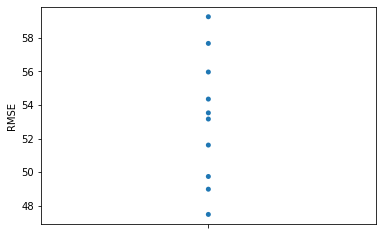

In [39]:
swarm=sns.swarmplot(y='RMSE',data=df2)## scaler 사용해도 소용은 없었다.

In [40]:
def tts_fit_score(model,X,Y,evaluation, size=0.25):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=size)
    
    model.fit(x_train,y_train)
    
    pred = lr.predict(x_test)
    
    score = evaluation(y_test,pred)
    return score

In [41]:
lr = LinearRegression()
diabets = datasets.load_diabetes()

In [42]:
scores=[tts_fit_score(lr,diabets.data,diabets.target,mean_squared_error) for _ in range(10)]  #리스트 컴프리헨션

In [43]:
scores

[3237.29412057169,
 2722.241794152424,
 3369.0652730516067,
 3039.425474928749,
 3143.960918391313,
 2895.370511169686,
 3483.391797438219,
 3189.2837052489945,
 3269.6750482871576,
 2951.2019359724186]

----------

### 

### Shuffle (KFold와 비교)

In [44]:
from sklearn.model_selection import ShuffleSplit

In [45]:
ss=ShuffleSplit(test_size=0.25,n_splits=10)

In [46]:
lr=LinearRegression()
diabets=datasets.load_diabetes()

In [47]:
scores=cross_val_score(lr,diabets.data,diabets.target,cv=ss, scoring="neg_mean_squared_error") #ShuffleSplit
# KFold [cross_val_score(model,X,Y,cv=5,scoring="neg_mean_squared_error") # 에러를 정수로 만들어서 사용할 수 있게끔 neg를 사용 ]와 비교하여 잘 이해해 두기

In [48]:
scores

array([-3135.88726321, -2942.01470444, -2983.0900088 , -3122.67566423,
       -2646.14808786, -2519.88155834, -3034.4129667 , -3077.25780072,
       -3001.17445334, -2367.43715168])

In [49]:
df3=pd.DataFrame({'RMSE' : np.sqrt(-scores)}) #scoores값이 음수이니까 -를 붙여서 -제거

In [50]:
df3.T

,0,1,2,3,4,5,6,7,8,9
RMSE,55.998993,54.240342,54.617671,55.880906,51.440724,50.198422,55.085506,55.473037,54.782976,48.656317


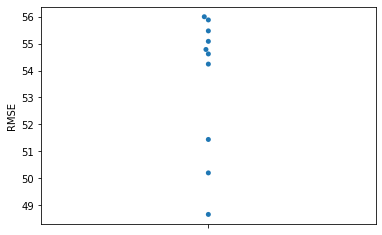

In [51]:
swarm=sns.swarmplot(y='RMSE',data=df3)

------------

### 차원을 높여서(직선에서 곡선으로)  
#### WHY 1차원 1차 함수 그래프로는 데이터를 원하는 대로 나누기 어렵기 때문에

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import numpy as np

In [80]:
np.random.seed(1) #랜덤값 고정

In [82]:
X=np.random.rand(40,1)**2
Y=(10-1/(X.ravel()+0.1)) + np.random.randn(40) #0.1을 더한 이유는 X.raver()이 0이 되면 0이 나오는 것을 방지하기 위해
X

array([[1.83262067e-01],
       [9.30916317e-01],
       [4.40154621e-01],
       [3.86505569e-01],
       [1.31666383e-02],
       [9.01529852e-01],
       [2.02420928e-01],
       [3.34534546e-01],
       [1.66575650e-01],
       [5.61817894e-02],
       [8.16094558e-01],
       [3.29108153e-01],
       [8.23877727e-06],
       [3.80867844e-01],
       [1.06696892e-01],
       [2.77790243e-01],
       [7.84893403e-01],
       [1.27641681e-01],
       [8.25436120e-01],
       [3.88577834e-01],
       [2.50311725e-04],
       [8.63853571e-01],
       [4.77338551e-01],
       [9.94652868e-01],
       [2.97012508e-02],
       [1.88062138e-02],
       [8.69734298e-01],
       [4.85555550e-01],
       [4.35602280e-03],
       [5.70724424e-01],
       [5.68329308e-01],
       [8.51974293e-01],
       [5.06267482e-01],
       [1.54432720e-02],
       [3.95219721e-04],
       [6.87015833e-04],
       [8.01257264e-04],
       [6.06198898e-02],
       [7.39648073e-01],
       [2.90338916e-01]])

In [55]:
import matplotlib.pyplot as plt

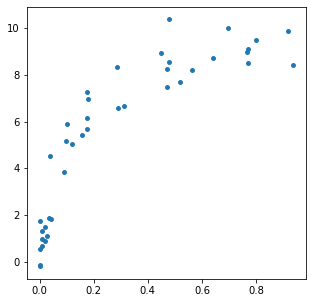

In [56]:
fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot()
ax.scatter(X.ravel(),Y,s=15)

In [57]:
X_test=np.linspace(-0.1,1.1,500).reshape(-1,1)
X_test[0]

array([-0.1])

In [58]:
poly=PolynomialFeatures(2)#2차원 n차원

In [59]:
X_poly=poly.fit_transform(X)# 차원을 높여준다.,x,x**2
X_test_poly=poly.transform(X_test)

In [60]:
lr=LinearRegression()

In [61]:
lr.fit(X_poly,Y)

LinearRegression()

In [62]:
Y_test=lr.predict(X_test_poly)

In [63]:
Y_test

array([-1.34013187, -1.2698606 , -1.19981531, -1.12999599, -1.06040263,
       -0.99103525, -0.92189383, -0.85297838, -0.78428891, -0.7158254 ,
       -0.64758786, -0.57957629, -0.51179069, -0.44423105, -0.37689739,
       -0.3097897 , -0.24290797, -0.17625222, -0.10982243, -0.04361861,
        0.02235923,  0.08811111,  0.15363702,  0.21893696,  0.28401093,
        0.34885894,  0.41348097,  0.47787703,  0.54204713,  0.60599125,
        0.66970941,  0.7332016 ,  0.79646781,  0.85950806,  0.92232234,
        0.98491065,  1.04727299,  1.10940937,  1.17131977,  1.2330042 ,
        1.29446267,  1.35569516,  1.41670169,  1.47748225,  1.53803683,
        1.59836545,  1.6584681 ,  1.71834478,  1.77799549,  1.83742023,
        1.89661901,  1.95559181,  2.01433865,  2.07285951,  2.13115441,
        2.18922333,  2.24706629,  2.30468328,  2.3620743 ,  2.41923935,
        2.47617843,  2.53289154,  2.58937868,  2.64563986,  2.70167506,
        2.7574843 ,  2.81306756,  2.86842486,  2.92355619,  2.97

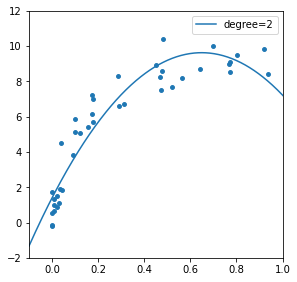

In [64]:
fig= plt.figure(figsize=(10,10))
ax= fig.add_subplot(2,2,2)
ax.scatter(X.ravel(),Y,s=15)
ax.plot(X_test.ravel(),Y_test, label='degree=2')
ax.set_xlim(-0.1,1.0)
ax.set_ylim(-2,12)
ax.legend(loc='best')

### 최적의 degree를 찾아라 (너무 높은 degree는 과적합 너무 낮은 degree는 학습이 안 됨)

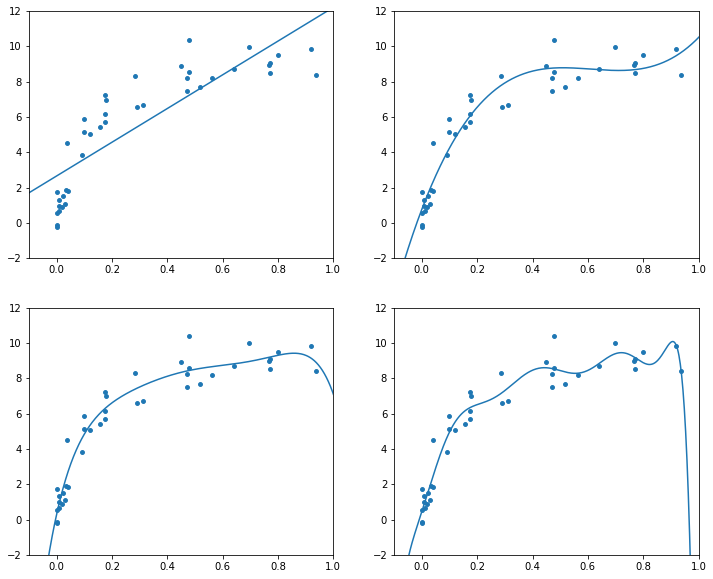

In [65]:
fig=plt.figure(figsize=(12,10))
X_test=np.linspace(-0.1,1.1,500).reshape(-1,1)
for i , degree in enumerate([1,3,6,10],start=1):
    Y_test=make_pipeline(PolynomialFeatures(degree),LinearRegression()).fit(X,Y).predict(X_test)# fit_transform 할 필요없이 한 번에 처리하기 
    
    ax= fig.add_subplot(2,2,i)
    ax.scatter(X.ravel(),Y,s=15)
    ax.plot(X_test.ravel(),Y_test, label='degree=2'+str(degree))
    ax.set_xlim(-0.1,1.0)
    ax.set_ylim(-2,12)

In [84]:
np.linspace(-0.1,1.1,500).reshape(-1,1)

array([[-1.00000000e-01],
       [-9.75951904e-02],
       [-9.51903808e-02],
       [-9.27855711e-02],
       [-9.03807615e-02],
       [-8.79759519e-02],
       [-8.55711423e-02],
       [-8.31663327e-02],
       [-8.07615230e-02],
       [-7.83567134e-02],
       [-7.59519038e-02],
       [-7.35470942e-02],
       [-7.11422846e-02],
       [-6.87374749e-02],
       [-6.63326653e-02],
       [-6.39278557e-02],
       [-6.15230461e-02],
       [-5.91182365e-02],
       [-5.67134269e-02],
       [-5.43086172e-02],
       [-5.19038076e-02],
       [-4.94989980e-02],
       [-4.70941884e-02],
       [-4.46893788e-02],
       [-4.22845691e-02],
       [-3.98797595e-02],
       [-3.74749499e-02],
       [-3.50701403e-02],
       [-3.26653307e-02],
       [-3.02605210e-02],
       [-2.78557114e-02],
       [-2.54509018e-02],
       [-2.30460922e-02],
       [-2.06412826e-02],
       [-1.82364729e-02],
       [-1.58316633e-02],
       [-1.34268537e-02],
       [-1.10220441e-02],
       [-8.6

In [89]:
np.arange(1,10,4) # 이거 나도 이해 못 했어ㅜㅜ

array([1, 5, 9])

In [87]:
np.linspace(1,10,4)

array([[ 1.],
       [ 4.],
       [ 7.],
       [10.]])

In [66]:
from sklearn.model_selection import validation_curve

In [67]:
degree=np.arange(0,21)

In [68]:
degree

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [69]:
model = make_pipeline(PolynomialFeatures(),LinearRegression())

In [70]:
train_score,test_score = validation_curve(model,X,Y,param_name='polynomialfeatures__degree',param_range=degree,cv=7)

In [71]:
train_score

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.72060505, 0.73235327, 0.71615237, 0.75517775, 0.6979951 ,
        0.74351307, 0.71104367],
       [0.8966661 , 0.89427274, 0.88460403, 0.90482859, 0.87685741,
        0.90106431, 0.90420325],
       [0.92830604, 0.93586649, 0.93273606, 0.95501615, 0.91919623,
        0.92673491, 0.9402878 ],
       [0.9386132 , 0.94947024, 0.94775706, 0.9632512 , 0.93425141,
        0.94148127, 0.94641559],
       [0.94121068, 0.94988755, 0.94891078, 0.9637873 , 0.93481636,
        0.94464031, 0.94706837],
       [0.94280027, 0.95011515, 0.95028793, 0.96555698, 0.93622172,
        0.94504929, 0.94928043],
       [0.94465044, 0.95166164, 0.95034312, 0.96584535, 0.93731514,
        0.94571392, 0.95274503],
       [0.94465097, 0.95169173, 0.95126473, 0.96709791, 0.93735454,
        0.9484231 , 0.95274521],
       [0.94935834, 0.9537075 , 0.95317786, 0.96799601, 0.93964532,
        0.9490145 , 0.9

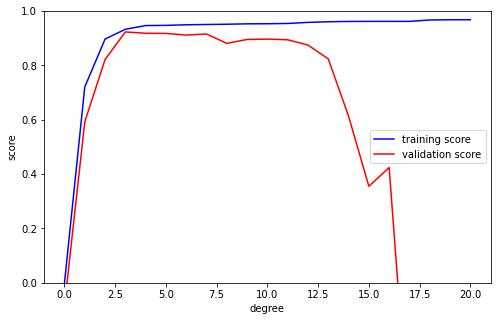

In [72]:
plt.figure(figsize=(8,5))
plt.plot(degree,np.median(train_score,1),"b-",label="training score")
plt.plot(degree,np.median(test_score,1),"r-",label="validation score")
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')
plt.legend(loc="best")
# [튜닝] :파라미터를 깎아서 스코어 높이는 것 ->가장 좋은 degree는 3이라고 유추가능

In [73]:
model2 = make_pipeline(PolynomialFeatures(3),LinearRegression())

In [74]:
train_score2,test_score2 = validation_curve(model,X,Y,param_name='polynomialfeatures__degree',param_range=degree,cv=7)

----

### 최적의 test_size찾기

In [75]:
from sklearn.model_selection import learning_curve

In [76]:
# X=np.random.rand(40,1)**2
# Y=(10-1/(X.ravel()+0.1)) + np.random.randn(40)
# Y

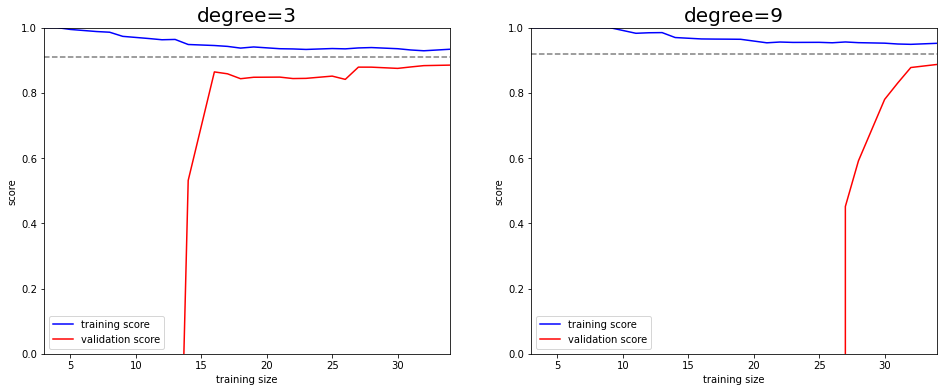

In [77]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
for i, degree in enumerate([3,9]):
    model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    n, train_lc, test_lc = learning_curve(model, X, Y, cv=7, train_sizes= np.linspace(0.1,1,25))
    ax[i].plot(n,np.mean(train_lc,1),"b-",label="training score")
    ax[i].plot(n,np.mean(test_lc,1),"r-",label="validation score")
    ax[i].hlines(np.mean([train_lc[-1], test_lc[-1]]), n[0], n[-1], color='gray',linestyle='dashed')
    ax[i].set(xlim=(n[0], n[-1]), ylim=(0,1), xlabel="training size", ylabel="score")
    ax[i].set_title("degree={}".format(degree), size=20)
    ax[i].legend(loc="best")
                 